In [1]:
from google.colab import files
file = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv(io.BytesIO(file['BostonHousing.csv']))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
Data=data.iloc[:,:-1]
Data.head()

y=Data.iloc[:, -1]
x=Data.iloc[:, :-1]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 15)

In [ ]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
import tensorflow
NB_EPOCHS = 100
BATCH_SIZE = 16
learning_rate=0.001

model = Sequential()
model.add(Dense(12, input_shape=(13,), kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(4, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=NB_EPOCHS, batch_size=BATCH_SIZE, verbose=2)

Epoch 1/100
26/26 - 1s - loss: 603.4553 - accuracy: 0.0000e+00 - val_loss: 544.0372 - val_accuracy: 0.0000e+00 - 682ms/epoch - 26ms/step
Epoch 2/100
26/26 - 0s - loss: 602.2725 - accuracy: 0.0000e+00 - val_loss: 542.9189 - val_accuracy: 0.0000e+00 - 83ms/epoch - 3ms/step
Epoch 3/100
26/26 - 0s - loss: 601.0994 - accuracy: 0.0000e+00 - val_loss: 541.8090 - val_accuracy: 0.0000e+00 - 80ms/epoch - 3ms/step
Epoch 4/100
26/26 - 0s - loss: 599.9313 - accuracy: 0.0000e+00 - val_loss: 540.6942 - val_accuracy: 0.0000e+00 - 70ms/epoch - 3ms/step
Epoch 5/100
26/26 - 0s - loss: 598.7552 - accuracy: 0.0000e+00 - val_loss: 539.5793 - val_accuracy: 0.0000e+00 - 70ms/epoch - 3ms/step
Epoch 6/100
26/26 - 0s - loss: 597.5925 - accuracy: 0.0000e+00 - val_loss: 538.4744 - val_accuracy: 0.0000e+00 - 73ms/epoch - 3ms/step
Epoch 7/100
26/26 - 0s - loss: 596.4276 - accuracy: 0.0000e+00 - val_loss: 537.3708 - val_accuracy: 0.0000e+00 - 86ms/epoch - 3ms/step
Epoch 8/100
26/26 - 0s - loss: 595.2712 - accuracy: 0

KeyboardInterrupt: ignored

In [ ]:
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model'+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

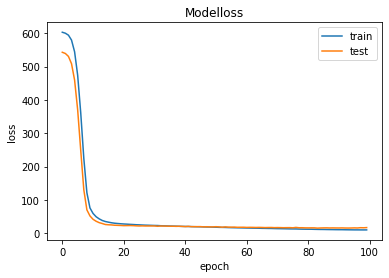

In [ ]:
modelplot(history, 'loss', 'val_loss')

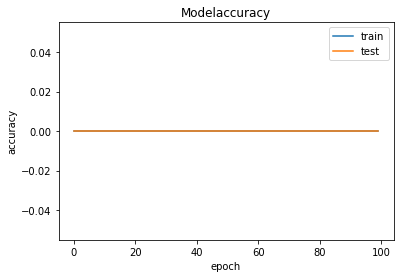

In [ ]:
modelplot(history, 'accuracy', 'val_accuracy')